In [3]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
driver = webdriver.Chrome(r'C:\Program Files (x86)\chromedriver\chromedriver.exe')
driver.get("https://rate.poultrybazaar.net/broiler_rates.aspx")

In [34]:
useful_cols = ['GUJRAT','MUMBAI','PUNJAB']
main_df2 = pd.DataFrame()
year_0 = 2012
for i in range(81):
    df = pd.DataFrame()
    results_table = []
    month = i%12 +1
    year = year_0 + i//12
#     time.sleep(1)
    select_year = Select(driver.find_element_by_id('ctl00_ContentPlaceHolder1__ddl_year'))
    select_year.select_by_value(str(year))
    select_month = Select(driver.find_element_by_id('ctl00_ContentPlaceHolder1__ddl_month'))
    select_month.select_by_value(str(month))
    get_list_button = driver.find_element_by_id('ctl00_ContentPlaceHolder1__btn_list')
    get_list_button.click()
    time.sleep(3)
    table = driver.find_element_by_id('ctl00_ContentPlaceHolder1__grid_show_data')
    rows = table.find_elements_by_tag_name("tr")
#     break
    df['Date'] = [pd.to_datetime(str(month) +'-'+ day +'-'+str(year)) for day in rows[0].text.split(' ')[:-1]]
    cc = 0
    for ind, tr in enumerate(table.text.split('\n')[1:],1):
        if useful_cols[cc] in tr:
            row = rows[ind]
            columns = row.find_elements_by_tag_name("td")
            df[useful_cols[cc]] = [col.text for col in columns[1:-1]]
            cc += 1
            if cc == 3:
                break
    main_df2 = pd.concat([main_df2,df],axis=0)
# main_df2 = main_df2.replace({' ': np.NaN}).astype('float')

In [37]:
main_df2.to_csv('gujrat_mumbai_punjab.csv',index=False)

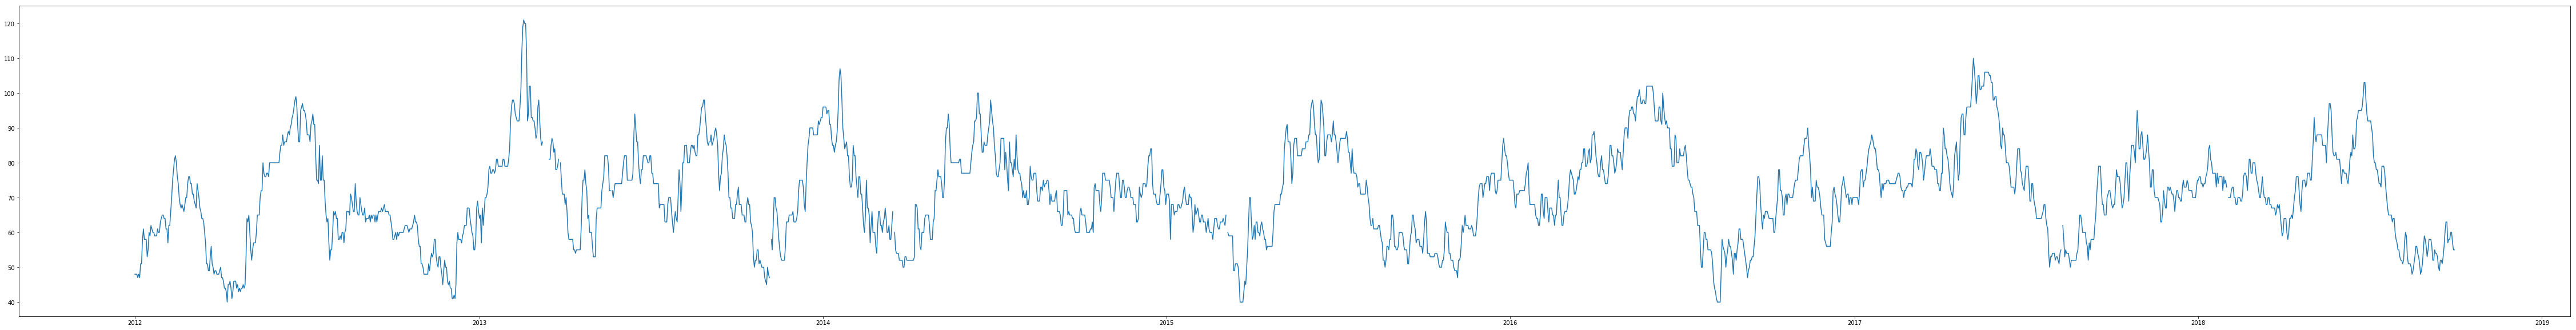

In [39]:
main_df2 = main_df2.replace({' ': np.NaN})
main_df2['PUNJAB'] = main_df2.PUNJAB.astype('float')
fig = plt.figure(figsize=(80,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(main_df2.Date,main_df2.PUNJAB)
plt.savefig('new.png')